In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data

In [5]:
df = pd.read_csv("singindex_networks_data.csv", index_col=0)
metadf = pd.read_csv("singindex_networks_metadata.csv")

In [6]:
df.describe()

,Investment in telecommunication infrastructure in OECD area (USD billion),Revenue in telecommunication in OECD area (USD billion),Subscription (million) of mobile broadband,Subscription (million) of cellular mobile,Subscription (million) of access telephone lines,Subscription (million) of fixed broadband,Subscription (million) of M2M SIM cards,Subscription (million) of fibre fixed broadband,Subscription (million) of cable fixed broadband,Number of machine to machine connections worldwide in billions,Forecast of 5G smartphone subscriptions worldwide (in million),Asia-Pacific 5G Subscription forcast 2021-2024 (in 1000 unit),Global 5G network infrastructure spending (billion USD),Percentage of 5G connections (excluding liscensed cellular IoT) (visual estimate),Number of Internet of Things (IoT) connected devices worldwids form 2019 to 2030 ( in billion),Number of internet users (in million) worldwide from 2005 to 2019
count,29.000000,29.000000,10.000000,23.000000,23.000000,21.000000,7.000000,12.000000,12.000000,8.00000,7.000000,6.000000e+00,10.000000,7.000000,12.000000,15.000000
mean,169.135517,976.855172,977.800000,1046.382609,443.782609,226.890476,145.628571,74.616667,118.183333,1.55000,1680.714286,3.561767e+05,13.980000,9.571429,15.938333,2453.066667
std,38.905102,354.903054,361.589946,520.844894,101.995970,147.319540,81.378062,34.559720,23.142909,1.00995,1150.940154,4.388603e+05,14.431278,7.044079,5.912856,933.848677
min,97.500000,353.700000,404.000000,120.000000,251.000000,0.700000,34.200000,32.000000,82.500000,0.50000,212.000000,4.488000e+03,2.000000,0.000000,7.740000,1100.000000
25%,146.300000,708.400000,733.250000,650.500000,366.000000,88.300000,97.800000,47.425000,101.025000,0.75000,826.000000,6.156500e+04,2.925000,5.000000,11.195000,1671.000000
50%,177.900000,1100.600000,989.000000,1188.000000,481.000000,267.900000,132.000000,67.050000,117.650000,1.30000,1618.000000,1.765840e+05,7.250000,9.000000,15.600000,2473.000000
75%,196.930000,1297.400000,1265.250000,1466.500000,542.000000,350.000000,192.850000,97.650000,135.825000,2.15000,2465.500000,5.069490e+05,21.375000,14.000000,20.362500,3152.000000
max,238.500000,1369.200000,1484.000000,1742.800000,552.000000,419.000000,271.900000,138.700000,154.100000,3.30000,3352.000000,1.139108e+06,41.800000,20.000000,25.440000,3969.000000


## Pre-processing

### Build index components

In [7]:
index_comps, metadf_rows = [], []
for (k, j) in enumerate(metadf["indicator"]):
    
    if metadf["improvement"].iloc[k] != 0:
        
        if (len(df[j].dropna()) > 2):
        
            # base value
            med_value = df[j].median()

            if np.isnan(med_value) == 0:

                # indicator and direction
                indicator = (df[[j]]/med_value) ** metadf["improvement"].iloc[k]

                if k==0:
                    df_index = indicator.copy()
                else:
                    df_index = pd.concat([df_index, indicator.copy()], axis=1)
                
                index_comps += [j]
                metadf_rows += [k]
                
df_index.index = df.index.copy()

### Export info

In [8]:
df[index_comps].to_csv("singindex_networks_raw_components.csv")
df_index.to_csv("singindex_networks_base_components.csv")
metadf.iloc[metadf_rows].to_csv("singindex_networks_new_metadata.csv")

## Interpolation, Build Index, and Extrapolation

In [9]:
from scipy import interpolate

In [15]:
# interpolation
df_interp_index = df_index.interpolate(method="spline", order=1)

<AxesSubplot:xlabel='Year'>

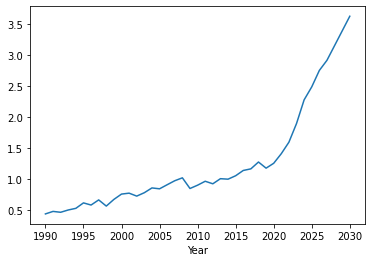

In [16]:
# build index
singindex_historic = df_interp_index.mean(axis=1)
singindex_historic.plot()

In [17]:
s_model = interpolate.interp1d(singindex_historic.index, singindex_historic.values, fill_value="extrapolate")

<AxesSubplot:>

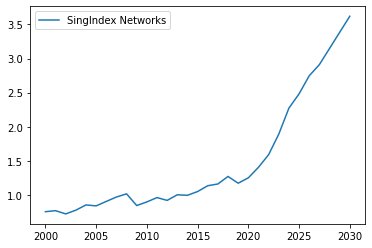

In [18]:
singindex = pd.DataFrame({"SingIndex Networks": s_model(range(2000, 2031))},
            index = list(range(2000, 2031)))
singindex.plot()

In [19]:
singindex

,SingIndex Networks
2000,0.754277
2001,0.769083
2002,0.721652
2003,0.776553
2004,0.853436
2005,0.839243
2006,0.904990
2007,0.969403
2008,1.016141
2009,0.844224


### Export

In [20]:
df_interp_index.to_csv("singindex_networks_base_components_interpolate.csv")
singindex_historic.to_csv("singindex_networks_avg_interpolate.csv")
singindex.to_csv("singindex_networks_avg_extrapolate_2000_2030.csv")